**Setup Environment**

In [ ]:
# mount google drive
from google.colab import drive
drive.mount('/content/drive')

# import Pillow libs to read images
from PIL import Image, IptcImagePlugin

# import glob to iterate over files
import glob

# matplotlib to display images
import matplotlib.pyplot as plt

Mounted at /content/drive


In [ ]:
# relative file path for Peter
path = '/content/drive/MyDrive/BC-Project4/project4images'

**Image Data Extraction**

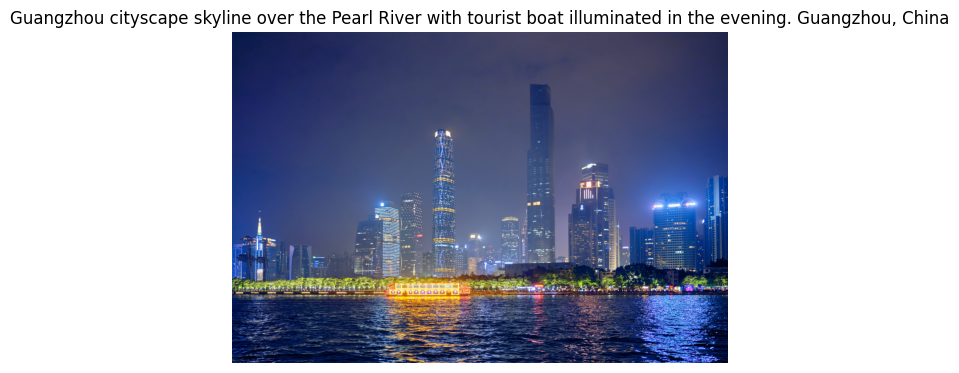

In [ ]:
# following Jacob's code, retrieve an image and its caption/title
img = Image.open(path+'/AdobeStock_679434911.jpeg')
iptc = IptcImagePlugin.getiptcinfo(img)
title = iptc.get((2,5)).decode()

# display the image and caption
plt.imshow(img)
plt.title(title)
plt.axis('off')
plt.show()

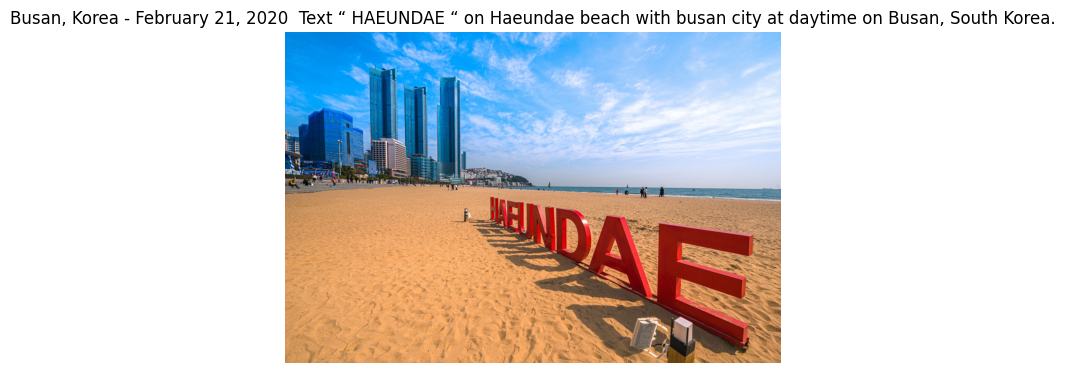

In [ ]:
# second test
img = Image.open(path+'/AdobeStock_328021568_Editorial_Use_Only.jpeg')
iptc = IptcImagePlugin.getiptcinfo(img)
title = iptc.get((2,5)).decode()

# display the image and caption
plt.imshow(img)
plt.title(title)
plt.axis('off')
plt.show()

In [ ]:
image_data = []

for file in glob.glob(path+'/*.jpeg'):
  img = Image.open(file)
  directory = {}

  directory['file_name'] = file.split('/')[-1]

  try:
    directory['caption'] = IptcImagePlugin.getiptcinfo(img).get((2,5)).decode()
  except:
    directory['caption'] = None

  try:
    directory['keywords'] = []
    undecoded_kws = IptcImagePlugin.getiptcinfo(img).get((2,25))
    for kw in undecoded_kws:
      directory['keywords'].append(kw.decode())
  except:
    directory['keywords'] = None

  image_data.append(directory)

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:3167: DecompressionBombWarning: Image size (99987864 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:3167: DecompressionBombWarning: Image size (94732000 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:3167: DecompressionBombWarning: Image size (90351625 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


In [ ]:
# images that don't have titles/we can't use
for img in image_data:
  if not img["caption"]:
    print(img["file_name"])

AdobeStock_203392215.jpeg
AdobeStock_183663474.jpeg
AdobeStock_225368627.jpeg
AdobeStock_343809418.jpeg
AdobeStock_228241978.jpeg
AdobeStock_305489172.jpeg
AdobeStock_340972131.jpeg


In [ ]:
# removing images that can't be used
filtered_img_data = [item for item in image_data if item['caption'] is not None]

In [ ]:
# check once more
for img in filtered_img_data:
    if not img["caption"] or img["caption"].strip() == '':
        print(img["file_name"])

In [ ]:
import csv

csv_file_path = '/content/drive/MyDrive/BC-Project4/metadata.csv'

field_names = ['file_name', 'caption', 'keywords']

with open(csv_file_path, 'w', newline='') as csvfile:
  csv_writer = csv.DictWriter(csvfile, fieldnames=field_names)
  csv_writer.writeheader()
  csv_writer.writerows(filtered_img_data)

#### **Credits**

Images in this project were obtained from Adobe Stock through an Education License and may not be repurposed by third parties. The Education License permits faculty members and staff members to use, reproduce, archive, modify, and display the asset: for advertising, marketing, promotional, and decoration purposes related solely to the Enterprise, for professional and academic activities related solely to the Enterprise, and not for any other commercial purpose. Students may use, reproduce, archive, modify, and display the asset in all media, solely in connection with course work at the Enterprise, and not for any other commercial or paid purposes. The use of these licensed images is therefore intended for the contributors to this educational project, as part of the edX bootcamp in collaboration with the University of Pennsylvania, and may not be used in other ways.